# Introduction to Jax

- Resource: https://jax.readthedocs.io/en/latest/notebooks/quickstart.html

In [33]:
import jax.numpy as jnp
import jax
from jax import grad, jit, vmap
from jax import random
from jax import device_put

In [10]:
key = random.PRNGKey(0)
x = random.normal(key, (10,))
print(x)

[-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]


In [11]:
size = 3000
x = random.normal(key, (size, size), dtype=jnp.float32)
x = device_put(x) # copy values back to CPU

In [21]:
def selu(x, alpha=1.67, lmbda=1.05):
    return lmbda * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

x = random.normal(key, (1000000,))
%timeit selu(x).block_until_ready()

1.63 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
selu_jit = jit(selu)
%timeit selu_jit(x).block_until_ready()

360 µs ± 11.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Automatic differentition

1. `grad()`
2. `jax.vjp`: reverse-mode vetor-jacobian products
3. `jax.jvp`: Forward-mode jacobian-vector products

## Index update

In [25]:
x = jnp.arange(10)
y = x.at[0].set(0)

In [27]:
jax_array = jnp.ones((5,6))
print(jax_array)

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [28]:
new_jax_array = jax_array.at[::2, 3:].add(7.)
print(new_jax_array)

[[1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 8. 8. 8.]]


## Linear regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt

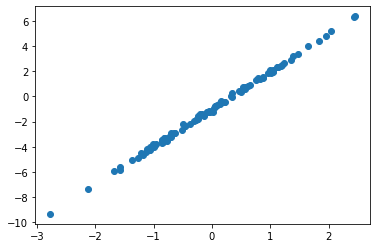

In [30]:
xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);

In [31]:
def model(theta, x):
    w, b = theta
    return w*x + b

def loss_fn(theta, x, y):
    prediction = model(theta,x)
    return jnp.mean((prediction - y)**2)

def update(theta, x, y, lr=0.1):
    return theta - lr * jax.grad(loss_fn)(theta, x, y)


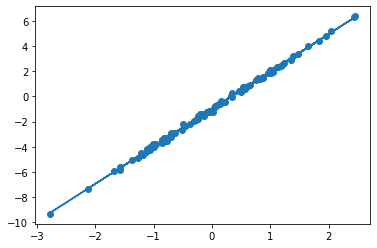

In [34]:
theta = jnp.array([1.,1.])

for _ in range(1000):
    theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta